In [522]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [539]:
def sigmoid(z):
   return 1 / (1 + np.exp(-z))
X = np.array([[200,17]])
w1_1 = np.array([1,2])
b1_1 = np.array([-1])
z1_1 = (np.dot( X,w1_1 ) +b1_1)
a1_1 = sigmoid(z1_1)
a1_1

array([1.])

In [541]:
w1_2 = np.array([-3,4])
b1_2 = np.array([1])
z1_2 = (np.dot( X,w1_2 ) +b1_2)
a1_2 = sigmoid(z1_2)
a1_2

array([2.45261912e-231])

In [543]:
w1_3 = np.array([5,-6])
b1_3 = np.array([2])
z1_3 = (np.dot( X,w1_3 ) +b1_3)
a1_3 = sigmoid(z1_3)
a1_3

array([1.])

In [545]:
a1 = np.array([a1_1,a1_2,a1_3])

In [532]:
a1

array([[1.00000000e+000],
       [2.45261912e-231],
       [1.00000000e+000]])

### Where a2_1

In [535]:
w2_1 = np.array([[-7,8,9]])
b2_1 = np.array([3])
z2_1 = np.dot(w2_1 , a1) +b2_1
a2 = sigmoid(z2_1)
a2

array([[0.99330715]])

In [537]:
df = pd.read_csv("C:\\Users\\PMLS\\Desktop\\Data_Sets\\Coffe_rost_Data.csv")


In [174]:
df

,Temprature,Duration,Taste
0,185.32,12.69,1
1,259.92,11.87,0
2,231.01,14.41,0
3,175.37,11.72,0
4,187.12,14.13,1
...,...,...,...
195,223.78,15.30,0
196,266.63,12.48,0
197,273.68,13.10,0
198,220.61,12.80,1


In [176]:
X = df[['Temprature', 'Duration']].values
y = df['Taste'].values

In [178]:
X.shape, y.shape

((200, 2), (200,))

In [477]:
y = y.reshape(-1,1)
y.shape

(200, 1)

In [487]:
def plot_Data(X,y,Q):
        
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0
    ax.scatter(X[pos][:, 0], X[pos][:, 1], c='r', marker='+', label='y=1')
    ax.scatter(X[neg][:, 0], X[neg][:, 1], c='b', marker='o', label='y=0')
    ax.legend()

In [319]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)

In [321]:
np.max(Xn[:,0]) , np.min(Xn[:,0])

(1.659659, -1.6853086)

In [323]:
np.max(Xn[:,1])  , np.min(Xn[:,1])

(1.7897582, -1.7021064)

In [425]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))




In [453]:
def dense(a_in , W,b):
    units = W.shape[1]
    a_out = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w , a_in) + b[j]
        a_out[j] = sigmoid(z)

    return a_out

In [455]:
def sequential(X,W1,b1,W2,b2):
    a1 = dense(X,W1 , b1 )
    a2 = dense(a1 , W2,b2)
    return a2

In [458]:
def predict(X,W1 , b1 , W2 , b2):
    m = X.shape[0]
    p  = np.zeros((m,1))
    for i in range(m):
        p[i,0] = sequential(X[i] , W1,b1 , W2 , b2)

    return (p)

In [460]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [464]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)
predictions

C:\Users\PMLS\AppData\Local\Temp\ipykernel_21296\2796903402.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i,0] = sequential(X[i] , W1,b1 , W2 , b2)


array([[9.71579948e-01],
       [3.28981203e-08]])

In [469]:
y_hat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        y_hat[i] = 1
    else:
        y_hat[i] = 0

print(f'decision {y_hat}')

decision [[1.]
 [0.]]


In [473]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions{yhat}")

decisions[[1]
 [0]]


In [493]:
netf= lambda x : my_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)

<function __main__.<lambda>(x)>

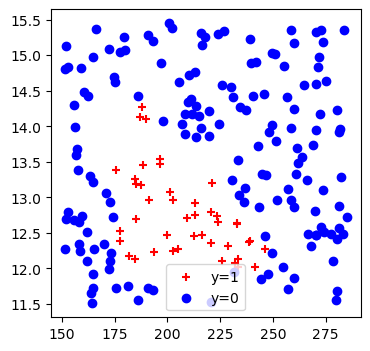

In [503]:
plot_Data(X,y,netf)